In [177]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/media/flalix/5c1ba0b4-f897-451c-9068-ac5e57194590/flalix/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
x = np.random.random(100)
y = np.random.random(100)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

seqx = np.linspace(0,1,50)
seqy = slope*seqx + intercept

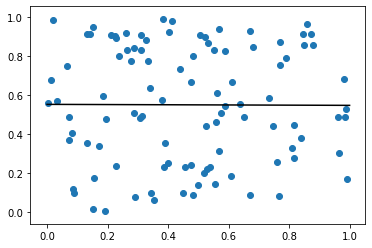

In [18]:
plt.scatter(x,y)
plt.plot(seqx, seqy, color="black")

In [10]:
slope, intercept

(0.09262592627165349, 0.4815123335433614)

In [19]:
r_value

-0.0045738889972568855

In [20]:
p_value, std_err

(0.9639765342319673, 0.11218650505568355)

### Reta perfeita - sem ruído !

In [24]:
x = np.linspace(0,100,51)
y = x*2

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

seqy = slope*x + intercept

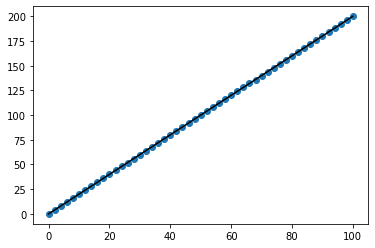

In [26]:
plt.scatter(x,y)
plt.plot(x, seqy, color="black")

In [27]:
slope, intercept

(2.0, 0.0)

### Correlação muito muito boa e positiva

In [28]:
r_value

1.0

In [29]:
p_value, std_err

(0.0, 0.0)

### Correlação imperfeita: ruído

In [49]:
x = np.linspace(0,100,51)
#             randomicos dist.normal(mean=0, SD=10, 51 pontos)
y = x*2 + 30*np.random.normal(0, 1.5, 51)  # sinal + ruído

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

seqy = slope*x + intercept

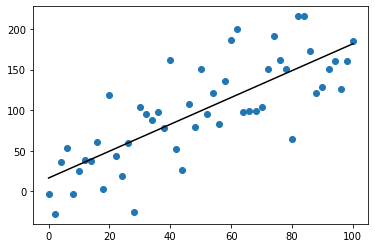

In [51]:
plt.scatter(x,y)
plt.plot(x, seqy, color="black")

### Pequeno desvio padrão amostral

In [55]:
x = np.linspace(0,100,51)
SSD = 0.1
y = x*2 + 30*np.random.normal(0, SSD, 51)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value, p_value

(0.9990432703469075, 2.8477758057665937e-68)

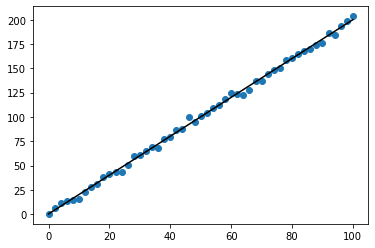

In [56]:
seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")

### Grande desvio padrão amostral

In [57]:
x = np.linspace(0,100,51)
SSD = 3
y = x*2 + 30*np.random.normal(0, SSD, 51)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value, p_value

(0.5792484576349792, 8.450918541887422e-06)

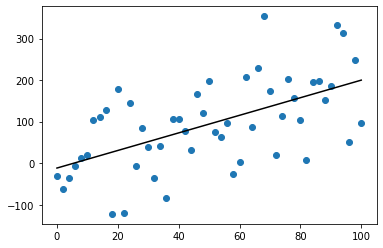

In [58]:
seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")

### Pequeno desvio padrão amostral - correlação negativa

In [59]:
x = np.linspace(0,100,51)
SSD = 0.1
y = -x*2 + 30*np.random.normal(0, SSD, 51)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value, p_value

(-0.9986612192700144, 1.065803147734253e-64)

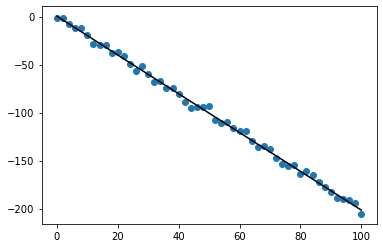

In [60]:
seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")

In [ ]:
### Grande desvio padrão amostral - correlação negativa

In [72]:
x = -np.linspace(0,100,51)
SSD = 3
y = -x*2 + 30*np.random.normal(0, SSD, 51)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value, p_value, std_err

(-0.45450487422880276, 0.0008067997477384585, 0.4138636206997103)

### yhat = valor predito

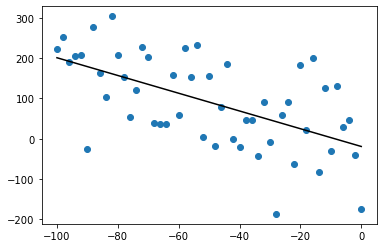

In [67]:
yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

In [70]:
erro = yhat - y
y0 = 0*x 

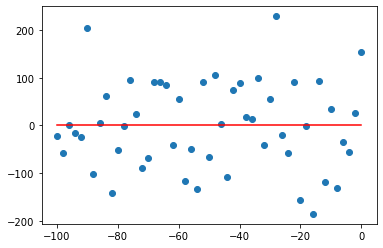

In [71]:
plt.scatter(x,erro)
plt.plot(x, y0, color="red");

In [73]:
np.sum(erro)

-4.973799150320701e-13

### soma dos erros ~0 , parece que o erro é uma distribuição normal

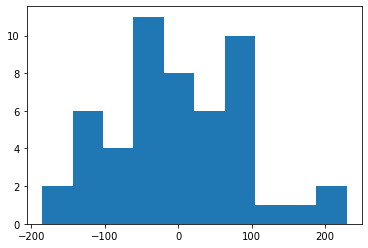

In [75]:
plt.hist(erro);

## Regressão

### coeficiente de correlação (positivo ou negativo)

  - 0.0 a 0.2 - sem correlação (muito ruim)
  - 0.2 a 0.4 - regular
  - 0.4 a 0.6 - bom
  - 0.6 a 0.8 - muito bom
  - 0.8 a 1   - ótimo

## Se voce espera linearidade entre as medidas que você fez?

  - Sim: TL x HL devo encontrar uma correlação > 0.6
    - TL x comprimento do rim esperar uma correlação > 0.6
  - Não: TL x Número de Escamas Ventrais - zero de correlação
    - se tiver correlação: não acreditar - é casual, é random !!! provavelmente
    - comprimento x altura onde vive - não correlação

### Máxima em estudos de correlações:
  - Correlação não uma demonstração de causa (causa x efeito)
    - ou seja, se fizer 100 experimentos diferentes com variáveis (cada um deles) não correlacinadas
      - 5% podem apresentar correlção (casual)

### Dois tipos de correlação NÃO LINEAR

In [105]:
x = np.linspace(0,100,51)
SSD = 3
y = x**2 + 30*np.random.normal(0, SSD, 51)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value, p_value

(0.966341854853256, 1.5040058066164077e-30)

Text(0.5, 1.0, 'função quadrática x**2\nmas a regressão linear é uma primeira aproximação!!!')

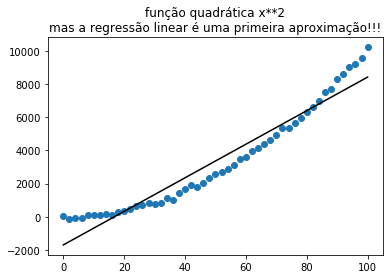

In [106]:
yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");
plt.title("função quadrática x**2\nmas a regressão linear é uma primeira aproximação!!!")

In [89]:
x = np.linspace(0,200,101)
SSD = 3
y = 10*x**2 + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value, p_value

(0.9676141079067022, 5.366277589328944e-61)

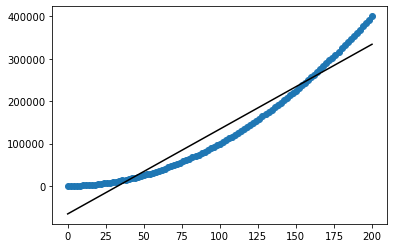

In [90]:
yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

### Terceiro grau

0.9155253381192942 6.119840728716359e-41


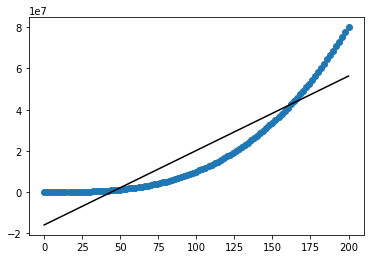

In [91]:
x = np.linspace(0,200,101)
SSD = 3
y = 10*x**3 + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

0.9165750561408078 3.382361057059915e-41


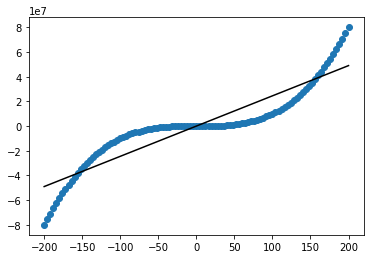

In [92]:
x = np.linspace(-200,200,101)
SSD = 3
y = 10*x**3 + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

0.9165747864620213 3.3828797321885526e-41


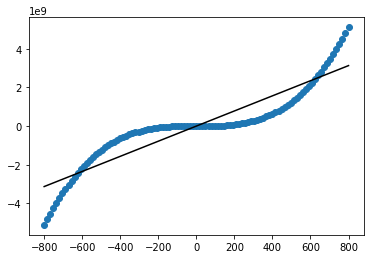

In [97]:
x = np.linspace(-800,800,101)
SSD = 3
y = 10*x**3 -5*x*2 + 3*x + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

### Exponencial (poderia pegar uma função logaritmica)

0.7717417931315995 3.55310969843041e-21


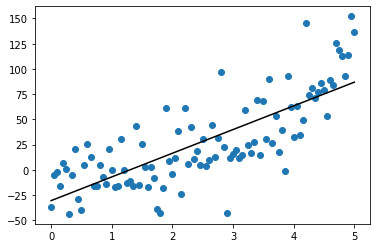

In [101]:
x = np.linspace(0, 5,101)
SSD = 1
y = np.exp(x) + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

0.6908019344236611 1.3073467461394573e-15


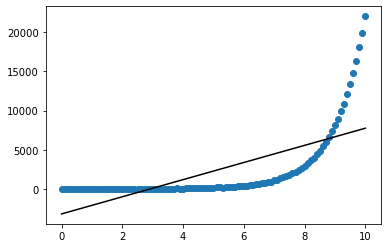

In [103]:
x = np.linspace(0, 10,101)
SSD = 1
y = np.exp(x) + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

0.2508084577396797 0.011412991126929188


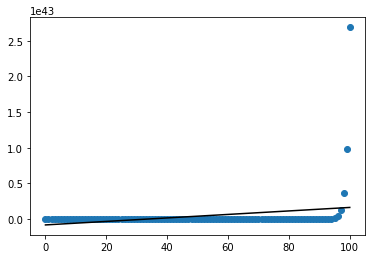

In [104]:
x = np.linspace(0, 100,101)
SSD = 1
y = np.exp(x) + 30*np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");

### Falei no meio de nossa jornada:
  - Lasso faz seleção de variáveis
  - Estude resíduos
  - PCA é linear, assim como a regressão linear - x1, x2, x3 --> auto-vetores resultado = a1*x1 + a2*x2 + a3*x3
  - Nós conseguimos transformar o PCA (linear) em não linear!  *** log, x^2 ... regressões --> tentando linearizar
  - Características emergentes: totalmente NÃO LINEARES
    - as escamas da cobra são resultados de múltiplas devido ao meio e mutações
  
### Misturar Biologia com Matemática
  - O que é característica emergente? Futuro Dr Biólogo?
    - o Kara reespondeu: um caracter conservado - ERRADISSIMO
    - o professor não concorda (muito calmo!!!)
    - NAO TEM AMBIVALÊNCIA: é um conceito muito bem definido ! não e não.
    - Próxima aula: o que é complexidade e o que emergência.

y = x^2 + erro (erro = N~(0,1)  

erro fora momentaneamente  

y = x^2  
log(y) = log(x^2)  

log(y) = 2*log(x)  

log(y) = y'  
log(x) = x'  

y' = 2*x' --> linearizei !!!


0.9683794121509129 3.3338560632946246e-31


Text(0.5, 1.0, 'função quadrática x**2\nmas a regressão linear é uma primeira aproximação!!!\nesta aproximação linear: é muito boa (veja o p-value)')

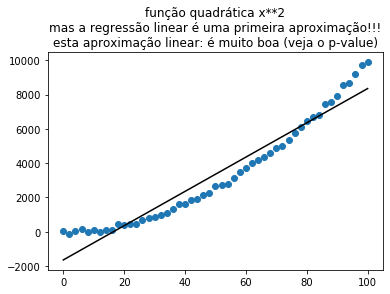

In [123]:
x = np.linspace(0,100,51)
SSD = 3
y = x**2 + 30*np.random.normal(0, SSD, 51)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)


yhat = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, yhat, color="black");
plt.title("função quadrática x**2\nmas a regressão linear é uma primeira aproximação!!!\nesta aproximação linear: é muito boa (veja o p-value)")

## Linearizar

In [118]:
x = np.linspace(2,102,51)
SSD = 3
y = x**2 + np.random.normal(0, SSD, 51)  # sinal + ruído

In [119]:
xl = np.log(x)
yl = np.log(y)  ## todos os valores de y > 0

0.9990251250906595 4.511577457051048e-68


Text(0.5, 1.0, 'função quadrática deve sumir!')

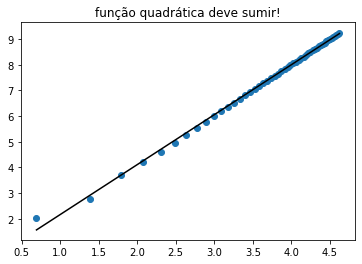

In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xl, yl)

print(r_value, p_value)

yhat = slope*xl + intercept

plt.scatter(xl,yl)
plt.plot(xl, yhat, color="black");
plt.title("função quadrática deve sumir!")

### 3 tipos de erros:
  - Sistemático: função é de segundo grau e eu aproximei para primeiro grau
  - O fenótipo é "flexível dentro de uma faixa" - natureza não é perfeita
  - Erros de flutuação: medir quente/frio, umido/seco

### Lição de casa:
  - Estudar resíduos
  - Emergência e complexidade (nota zero para escola Colombiana !)
  - Overfiting

### Outlier

0.9975555517936661 3.116829307018433e-116


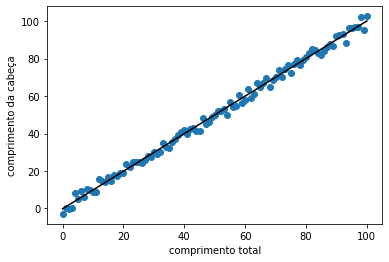

In [128]:
x = np.linspace(0,100,101)

SSD = 2
y = x + np.random.normal(0, SSD, 101)  # sinal + ruído
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")
plt.xlabel("comprimento total")
plt.ylabel("comprimento da cabeça");

0.9933908388279649 6.806422122238294e-95


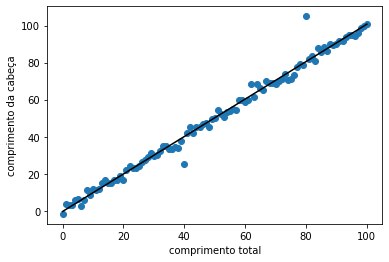

In [130]:
x = np.linspace(0,100,101)

SSD = 2
y = x + np.random.normal(0, SSD, 101)  # sinal + ruído
y[40] = 25
y[80] = 105

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")
plt.xlabel("comprimento total")
plt.ylabel("comprimento da cabeça");

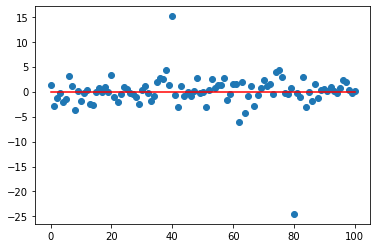

In [131]:
# valor predicto = a * x + b;  a = inclinação (slope) e b = onde cruza no eixo y
yhat = slope*x + intercept

#- erro = valor predito - valor real
erro = yhat - y
y0 = 0*x 
plt.scatter(x,erro)
plt.plot(x, y0, color="red");

### Outlier estraga todas uma regressão

0.9985239654215669 1.0651991580916715e-12


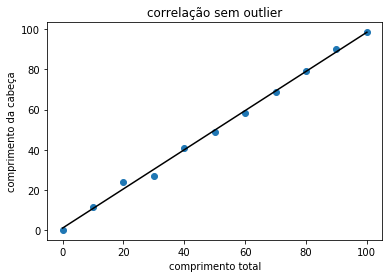

In [133]:
x = np.linspace(0,100,11)

SSD = 2
y = x + np.random.normal(0, SSD, 11)  # sinal + ruído

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(r_value, p_value)

seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")
plt.title("correlação sem outlier")
plt.xlabel("comprimento total")
plt.ylabel("comprimento da cabeça");

slope 0.992349457324597 intercept 0.26965580482774953
r 0.9995208127595854 p-value 1.9880619356188593e-16


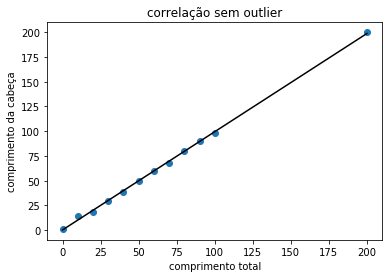

In [140]:
x = list(np.linspace(0,100,11))
x.append(200) # 12o ponto
x = np.array(x)

SSD = 2
y = x + np.random.normal(0, SSD, 12)  # sinal + ruído
y[11] = 200

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("slope", slope, "intercept", intercept)
print("r", r_value, "p-value", p_value)

seqy = slope*x + intercept

plt.scatter(x,y)
plt.plot(x, seqy, color="black")
plt.title("correlação sem outlier")
plt.xlabel("comprimento total")
plt.ylabel("comprimento da cabeça");

slope 1.169055929018791 intercept -7.549634508870668
r 0.9927649237813397 p-value 1.5424886038451555e-10


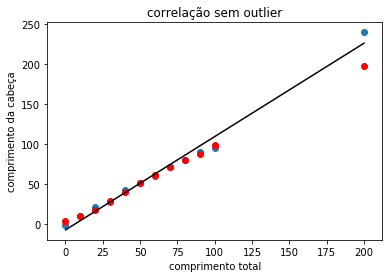

In [144]:
x = list(np.linspace(0,100,11))
x.append(200) # 12o ponto
x = np.array(x)

SSD = 2
y = x + np.random.normal(0, SSD, 12)  # sinal + ruído
y_esperado = x + np.random.normal(0, SSD, 12)
y[11] = 240

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("slope", slope, "intercept", intercept)
print("r", r_value, "p-value", p_value)

seqy = slope*x + intercept

plt.scatter(x,y)
plt.scatter(x, y_esperado, color="red")
plt.plot(x, seqy, color="black")
plt.title("correlação sem outlier")
plt.xlabel("comprimento total")
plt.ylabel("comprimento da cabeça");

slope 2.0893590833611766 intercept -46.70746236739653
r 0.9360413038215443 p-value 7.566267381505509e-06


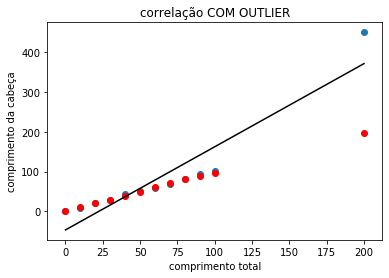

In [145]:
x = list(np.linspace(0,100,11))
x.append(200) # 12o ponto
x = np.array(x)

SSD = 2
y = x + np.random.normal(0, SSD, 12)  # sinal + ruído
y_esperado = x + np.random.normal(0, SSD, 12)
y[11] = 450 # OUTLIER !!!!

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("slope", slope, "intercept", intercept)
print("r", r_value, "p-value", p_value)

seqy = slope*x + intercept

plt.scatter(x,y)
plt.scatter(x, y_esperado, color="red")
plt.plot(x, seqy, color="black")
plt.title("correlação COM OUTLIER")
plt.xlabel("comprimento total")
plt.ylabel("comprimento da cabeça");

### Moral da história:
  - Numa regreação linear ou não linear
  - Se eu não tirar os outliers: bias - desvio, erro violento!

### Enxergar de uma outra forma
  - Variável que pode ser representada por uma distribuição normal
    - Peso: sim (correto) - porque? var continua, simetrico, media = mediana ....
    - Comprimento: sim (correto) - porque?  var continua, simetrico, media = mediana ....
    - Número de escamas: não (correto) - porque? var discreta, não normal ~ pode se aproximar da normalidade
    - Temperatura aonde vive: sim (errado) - porque? continua e não normal !!!! tem >= 2 picos (modas)

### Vamos ver graficamente

Text(0.5, 1.0, 'Mediana = 506.59\ndistriuição normal média ~= mediana')

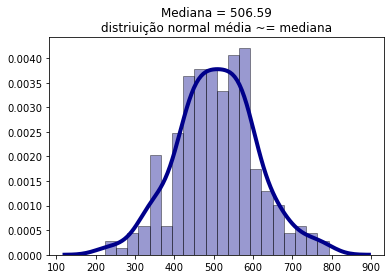

In [191]:
peso_medio = 500 # gramas
#-- não acredito --------
# maior peso --> 3200 g
# menor peso --> 14 g

#----- vou inventar numeros ------
#--- media = 500
#--- maximo = 500 + 100*3 = 800
#--- minimo = 500 - 100*3 = 200 

peso_medio = 500 # gramas
desvio_padrao = 100
n_cobras = 242 # cobras digitais

cobras = np.arange(0, n_cobras)  # 0, 1, 2 .... 241 (python começa no zero)
y = np.random.normal(peso_medio, desvio_padrao,n_cobras)

# Density Plot and Histogram of all arrival delays
sns.distplot(y, hist=True, kde=True, 
             bins=int(20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

mediana = np.quantile(y, q=.5)
title = "Mediana = %.2f\ndistriuição normal média ~= mediana"%(mediana)
plt.title(title)

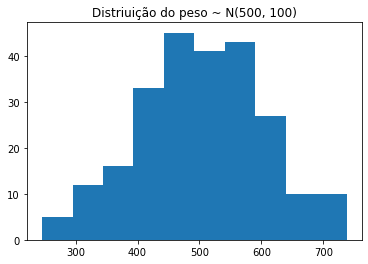

In [181]:
plt.hist(y)
plt.title("Distriuição do peso ~ N(500, 100)");

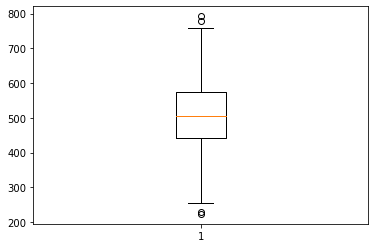

In [192]:
plt.boxplot(y);

Text(0.5, 1.0, 'limite inferior, abaixo são outliers inferiores\nbox de interquartis (25%, 50%, 75%)\n  - 25% - são os primeiros 25% individuos\n  - 50% - são os primeiros 50% individuos\n  - 75% - são os primeiros 75% individuos\nlimite superior, acima são outliers superiores\n')

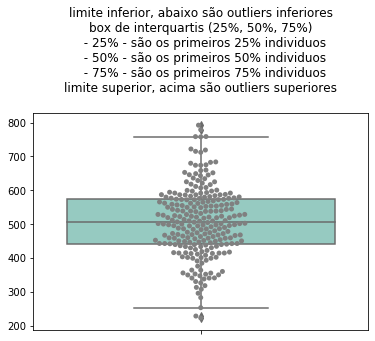

In [200]:
ax = sns.boxplot(y=y, palette="Set3")
ax = sns.swarmplot(y=y, color="gray")
plt.title("limite inferior, abaixo são outliers inferiores\n"+
          "box de interquartis (25%, 50%, 75%)\n" +
          "  - 25% - são os primeiros 25% individuos\n" +
          "  - 50% - são os primeiros 50% individuos\n" +
          "  - 75% - são os primeiros 75% individuos\n" +
          "limite superior, acima são outliers superiores\n"
         )

In [170]:
peso_medio = 500 # gramas
#-- não acredito --------
# maior peso --> 3200 g
# menor peso --> 14 g

#----- vou inventar numeros ------
#--- media = 500
#--- maximo = 500 + 100*3 = 800
#--- minimo = 500 - 100*3 = 200 

# EXPERIMENTO DO DR.SERGEYVE

peso_medio = 500 # gramas
desvio_padrao = 100
n_cobras = 242 # cobras digitais + 2 outliers do dr.

cobras = np.arange(0, n_cobras+2)  # 0, 1, 2 .... 241 (python começa no zero)

y = np.random.normal(peso_medio, desvio_padrao,n_cobras)
y[0] = 14
y[113] = 3200

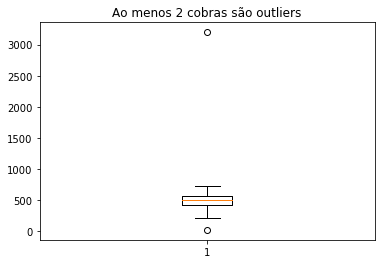

In [172]:
plt.boxplot(y)
plt.title("Ao menos 2 cobras são outliers");

### Distriuição normal
  - Média = Mediana = Moda
  - Mediana = quantil(0.5)

In [176]:
# mediana
np.quantile(y, q =[0.5])

array([498.72557909])

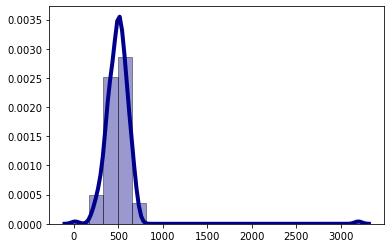

In [179]:
# Density Plot and Histogram of all arrival delays
sns.distplot(y, hist=True, kde=True, 
             bins=int(20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### Temperatura não é normal (apesar de varivel ser continua), pois tem 4 modas !!!

Text(0.5, 1.0, 'Temperatura média, devo encontrar 4 picos (modas)')

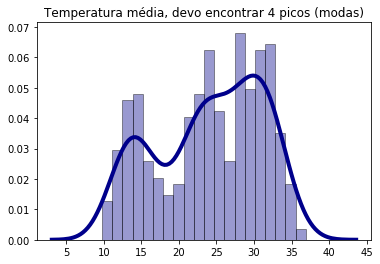

In [204]:
n = 100 # verao, primaver, outono, inverno

tverao = 32
tprimavera = 28
toutono = 22
tinverno = 14

y = list(np.random.normal(tverao, 2, n)) + \
    list(np.random.normal(tprimavera, 2, n)) + \
    list(np.random.normal(toutono, 2, n)) + \
    list(np.random.normal(tinverno, 2, n)) 

# Density Plot and Histogram of all arrival delays
sns.distplot(y, hist=True, kde=True, 
             bins=int(20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

title = "Temperatura média, devo encontrar 4 picos (modas)"
plt.title(title)